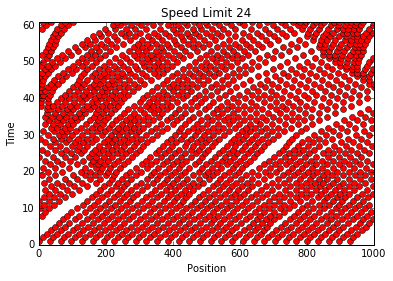

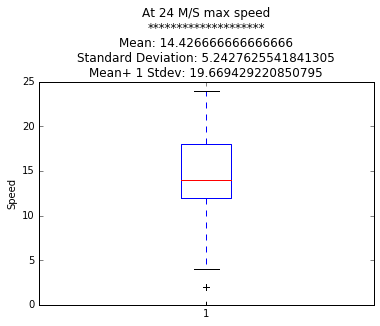

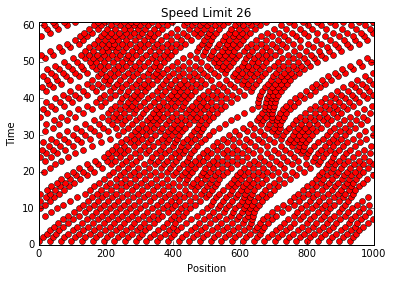

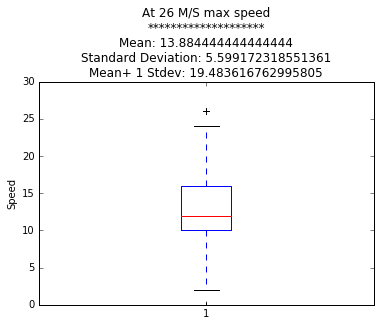

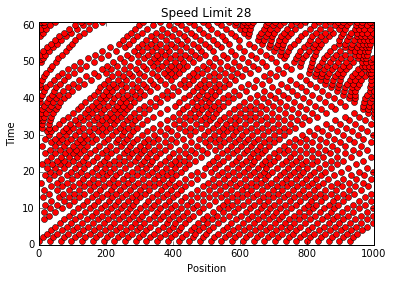

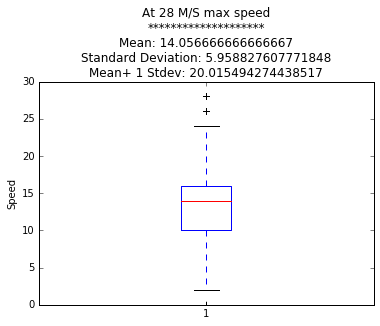

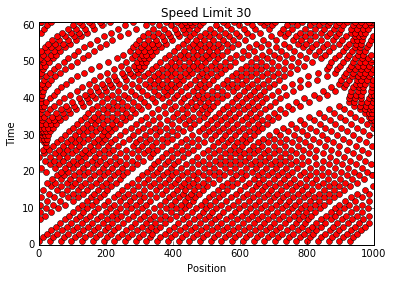

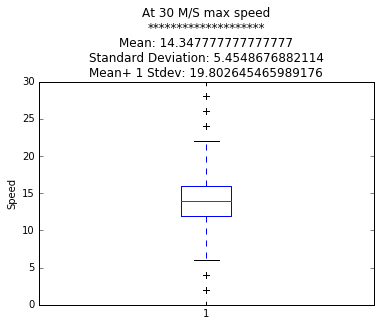

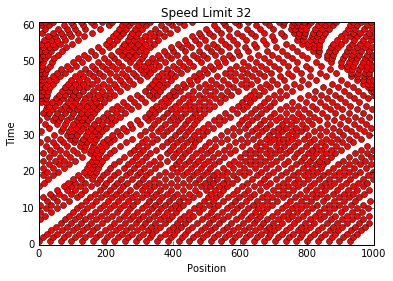

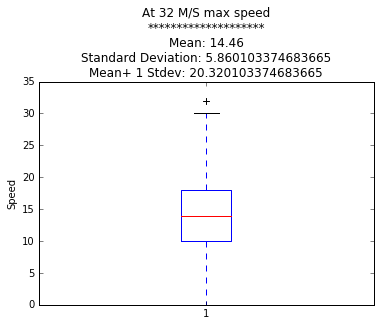

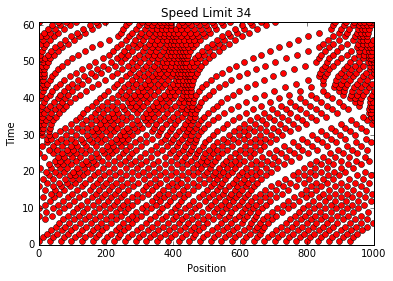

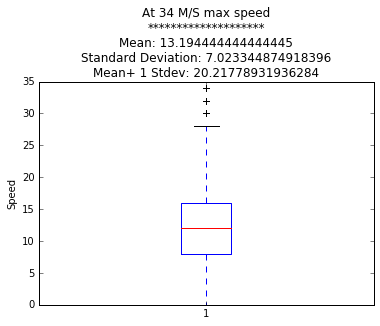

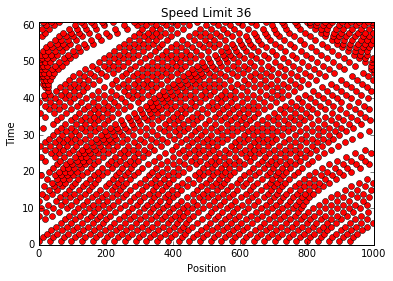

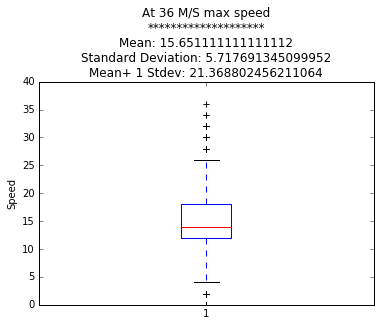

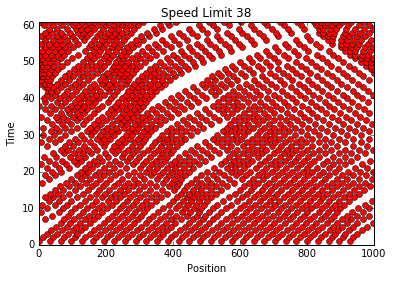

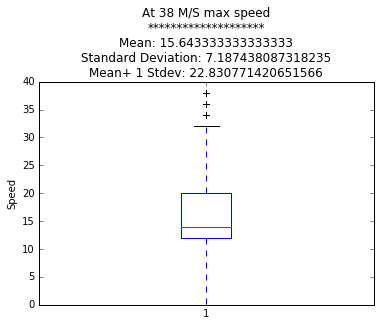

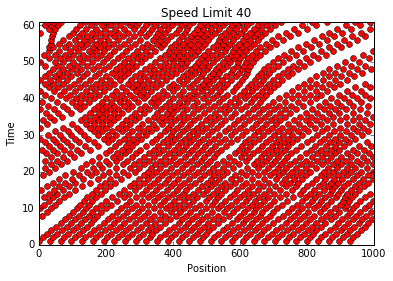

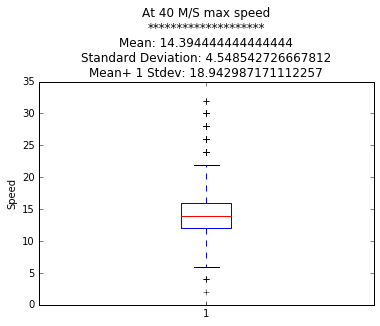

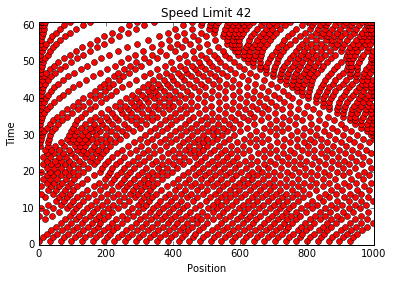

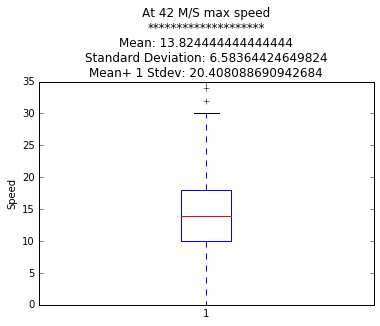



************************************************

That means that 73.0 km/h is the best speed limit!

************************************************



In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import statistics as st
import random
import numpy as np

class Road():
	def __init__(self, length = 1000,curve = 0):
		self.length = length
		self.curve = curve

	def road_loop(self , car_list, car, next_car):
		if next_car.position[0] - 5 < 6:
			car.position[0] = 1000
			car.speed = 0
		else:
			car.position[0] -= 1000
			car_list.insert(0,car_list.pop())
			car.collision_check(next_car)
		return car_list

class Car():
	def __init__(self, position, carID = 0, max_speed = 33, length = 5, speed = 10):
		self.length = length
		self.position = position
		self.carid = carID
		self.bumper = self.position[0] - 5
		self.max_speed = max_speed
		self.speed = speed
		self.accel = 2


	def __str__(self):
		"I'm car #{}, at position {}".format(self.carid, self.position)


	def change_speed(self):
		if random.randint(1,10) == 7 and self.speed != 0:
			self.speed -= self.accel
		elif self.speed + self.accel > self.max_speed:
			self.speed = self.max_speed
		else:
			self.speed += self.accel

	def collision_check(self, next_car):
		difference = (next_car.position[0] - 5) - self.position[0]
		if difference < self.speed:
			if difference <= 0:
				self.position[0] = next_car.position[0] - 7
				self.speed = 0
			else:
				self.speed = next_car.speed
		return self.position


	def move_car(self):
		self.position[0] += self.speed
		self.position[1] +=  1
		return self.position

	def needs_road_loop(self):
		if self.position[0] > 1000:
			return True

class Sim():
	def __init__(self):
		self.num_of_cars = 30
		self.car_list = []
		self.car_position_list = []
		self.car_speed_list = []


	def __str__():
		print("Runs the simulation.")

	def create_cars(self, max_speed):
		self.car_list = [Car([i * 32 + 1, 1], i+1, max_speed = max_speed) for i in range(self.num_of_cars)]
		return self.car_list

	def update_positions(self, road):
		self.car_position_list = []
		for i, car in enumerate(self.car_list):
			self.next_car = self.find_next_car(car, self.car_list, i)
			car.move_car()

			if car == self.car_list[-1]:
				if car.needs_road_loop():
					self.car_list = road.road_loop(self.car_list, car, self.next_car)
				else:
					car.change_speed()

			else:
				car.change_speed()
				car.position = car.collision_check(self.next_car)

		self.car_speed_list = [car.speed for car in self.car_list]
		self.car_position_list = [car.position for car in self.car_list]



	def find_next_car(self, car, car_list, i):
		if car != self.car_list[-1]:
			next_car = self.car_list[i+1]
		else:
			next_car = self.car_list[0]
		return next_car



def main():
    sim = Sim()
    road = Road()

    varied_max_speed_position_dict = {}
    varied_max_speed_speed_dict = {}

    means_and_devs = []

    for idx in range(12, 22):
        master_list = []
        master_speed_list = []
        limit = idx*2

        sim.create_cars(limit)

        start_list = []

        for i in sim.car_list:
            start_list.append(i.position)

        master_list.append(np.array(start_list))

        for sec in range(60):
            sim.update_positions(road)
            master_list.append(np.copy(sim.car_position_list))
            master_speed_list.append(np.copy(sim.car_speed_list))


        all_xs = []
        all_ys = []
        
        for second in master_list:
            for position in second:
                all_xs.append(position[0])

        for second in master_list:
            for position in second:
                all_ys.append(position[1])

        plt.plot(all_xs, all_ys, 'ro')
        plt.ylabel("Time")
        plt.xlabel("Position")
        plt.title("Speed Limit {}".format(idx*2))
        plt.axis([0, 1000, 0, 61])
        plt.show()

        all_speeds = []
        
        for second in master_speed_list:
            for speed in second:
                all_speeds.append(speed)
                
        mean = st.mean(all_speeds)
        stdev = st.stdev(all_speeds)
        
        means_and_devs.append(mean + stdev)
            
        plt.boxplot(all_speeds, 0, '+')
        plt.ylabel("Speed")
        plt.title("At {} M/S max speed\n********************\nMean: {}\nStandard Deviation: {}\nMean+ 1 Stdev: {}".format((idx*2),mean, stdev, mean + stdev))
        plt.show()
        print()
        varied_max_speed_speed_dict[limit] = master_speed_list
        varied_max_speed_position_dict[limit] = master_list
    print("\n************************************************\n")
    print("That means that {} km/h is the best speed limit!".format(round(3.6 * st.mean(means_and_devs))))
    print("\n************************************************\n")

main()
